# Анализ рынка заведений общественного питания 

<a class="anchor" id="toc"></a>

## Оглавление:
* [Описание проекта](#first-bullet)
* [План выполнения работы](#third-bullet)
* [Работа над проектом](#work-bullet)
    * [Шаг 1. Загрузка и предобработка данных](#step1-bullet)
    * [Шаг 2. Анализ данных](#step2-bullet)
    * [Шаг 3. Вывод и рекомендации](#step3-bullet)

## Описание проекта <a class="anchor" id="first-bullet"></a>

Мы решили открыть нестандартное кафе. Проект амбициозный и требует много вложений. Цель нашего исследования -  проанализировать текущее положение дел на рынке - сможем ли мы конкурировать среди устоявшихся лидеров, какими чертами обладают самые распространенные заведения?

## План выполнения работы <a class="anchor" id="third-bullet"></a>

### Шаг 1. Загрузка и предобработка данных
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработаем их. 

### Шаг 2. Анализ данных

-    Исследуем количественное соотношение видов объектов общественного.
-    Рассчитаем соотношение сетевых и несетевых заведений по количеству.
-    Выясним, для каких видов заведений сетевых заведений больше?
-    Проанализируем, что характерно для сетевых заведений.
-    Для каждого вида объекта общественного питания опишем среднее количество посадочных мест.
-    Выделим улицы с наибольшим количеством объектов общественного питания. Найдем районы расположения улиц.
-    Найдем число улиц с одним объектом общественного питания. Также выясним, в каких районах находятся эти улицы.
-    Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.  

### Шаг 3. Вывод

Сделаем общий вывод и сформулируем рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.

## Работа над проектом <a class="anchor" id="work-bullet"></a>

### Шаг 1. Загрузка и предобработка данных <a class="anchor" id="step1-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import re
from io import BytesIO
import requests
from urllib.parse import urlencode
from PIL import Image

In [2]:
rest_data = pd.read_csv('../datasets/rest_data.csv')

In [3]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
def first_look_on_data(data, n):
    """
    Выводит основную информацию по датасету:
    первые n строк;
    размер;
    информацию о типах столбцов;
    имена столбцов;
    число пропусков в столбцах;
    число дубликатов;
    уникальные значения столбцов для типа object;
    таблицу describe для типов данных int и float.
    """
    print ('\033[1m' + f'Первые {n} строк:' + '\033[0m')
    display(data.head(n))
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Info' + '\033[0m')
    data.info()
    print('-------------------------------------------------------------------------')
    print(f'В датасете {data.shape[0]} строк и {data.shape[1]} столбцов.')
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Названия столбцов' + '\033[0m')
    print(data.columns)
    print('-------------------------------------------------------------------------')  
    print ('\033[1m' + 'Число пропусков:' + '\033[0m')
    display(data\
            .isna()\
            .sum()\
            .to_frame()\
            .assign(perc = lambda row: row[0]/data.shape[0])\
            .rename(columns={0:"Кол-во пропусков", "perc":"Процент пропусков"})\
            .style.set_table_styles(
        [{'selector': 'tr:hover',
          'props': [('background-color', '#0B62B9')]}]
    ))
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Число дубликатов:' + '\033[0m')
    print(data.duplicated().sum())
    print('-------------------------------------------------------------------------')
    print ('\033[1m' + 'Уникальные значения столбцов:' + '\033[0m')
    print()

    for col in data.columns:
        if 'id' in col.lower():
            pass
        elif 'object' in data[col].dtype.name:
            print ('\033[1m' + 'Число уникальных значений:' + '\033[0m')
            print(data[col].nunique())
            print('-------------------------')
            print(data[col].value_counts())
            print()
        else:
            print(data[col].describe())
            print()

In [5]:
first_look_on_data(rest_data, 5)

Первые 5 строк:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


-------------------------------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
-------------------------------------------------------------------------
В датасете 15366 строк и 6 столбцов.
-------------------------------------------------------------------------
Названия столбцов
Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')
-------------------------------------------------------------------------
Число пропусков:


,Кол-во пропусков,Процент пропусков
id,0,0.000000
object_name,0,0.000000
chain,0,0.000000
object_type,0,0.000000
address,0,0.000000
number,0,0.000000


-------------------------------------------------------------------------
Число дубликатов:
0
-------------------------------------------------------------------------
Уникальные значения столбцов:

Число уникальных значений:
10393
-------------------------
Столовая                         267
Кафе                             236
Шаурма                           234
KFC                              155
Шоколадница                      142
                                ... 
Кафе «Федя Дичь»                   1
БаБу                               1
Crazy Brothers                     1
Амстердам чипс компани             1
Столовая «Arcus Bar and food»      1
Name: object_name, Length: 10393, dtype: int64

Число уникальных значений:
2
-------------------------
нет    12398
да      2968
Name: chain, dtype: int64

Число уникальных значений:
9
-------------------------
кафе                                 6099
столовая                             2587
ресторан                             228

В датасете 15366 строк и 6 столбцов. Типы данных столбцов верные. Названия столбцов корректны. Пропусков нет. Дубликаты пока не обнаружены.  
Но значения в столбцах не везде указаны в одном регистре, в следствие этого могут появиться дубликаты.

Приведем значения в столбцах типа `object` к нижнему регистру для удобства работы с ними. И заодно еще раз проверим на дубликаты.

In [6]:
rest_data.loc[:,rest_data.select_dtypes(include=['object']).columns] = \
rest_data.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

In [7]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [8]:
rest_data.duplicated().sum()

0

Посмотрим внимательнее на столбец с названиями заведений.

In [9]:
rest_data['object_name'].nunique()

9924

Изначально у нас было 10393 уникальных названий объектов общественного питания. После преобразования регистра осталось 9924 уникальных объекта.  
Также в названиях присутствуют слова 'кафе', 'ресторан', 'закусочная' и т. д. Их тоже лучше удалить, так как одно и то же заведение могли записать и без этих слов пояснений.

In [10]:
rest_data['object_new_name'] = rest_data['object_name'].str.replace('ресторан ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('закусочная ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('»', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('«', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('пицерия ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('пиццерия ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('бар ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('паб ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str\
.replace('предприятие быстрого обслуживания ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str\
.replace('предприятие быстрого питания ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str\
.replace('кафе быстрого питания ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('кафе ', '').str.strip()
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('кофейня ', '').str.strip()

In [11]:
rest_data['object_new_name'].nunique()

9352

Мы добились значительных улучшений. Но если посмотреть на названия объектов, можно заметить, что одни и те же заведения могут быть записаны не только по-русски. Составим словарик, где разным вариациям названий будет соответствовать только одно.

In [12]:
object_names = {
    'starbucks': 'старбакс',
    'кофейня старбакс кофе': 'старбакс',
    'старбакс starbucks': 'старбакс',
    'starbucks старбакс': 'старбакс',
    'кофемания starbucks': 'старбакс',
    'starbucks, старбакс кофе': 'старбакс',
    'starbucks coffee': 'старбакс',
    'starbucks кофе': 'старбакс',
    'старбакс кофе': 'старбакс',
    'кофейня шоколадница':'шоколадница',
    'шоколадница кофемания': 'шоколадница',
    'шоколадница кофе хаус': 'шоколадница',
    'закусочная kfc':'kfc',
    'предприятие быстрого обслуживания kfc': 'kfc',
    'пбо kfc': 'kfc',
    'пбо kfc покрышкина': 'kfc',
    'kfc волгоградский': 'kfc',
    'быстрого питания kfc': 'kfc',
    'kfc.': 'kfc',
    'кфс': 'kfc',
    'ростикс kfc': 'kfc',
    'mealty': 'милти',
    'fridays kfc': 'kfc',
    'предприятие быстрого обслуживания макдоналдс': 'макдоналдс',
    'москва - макдоналдс': 'макдоналдс',
    'mcdonalds': 'макдоналдс',
    'бургер кинг burger king': 'бургер кинг',
    'бурген кинг': 'бургер кинг',
    'кафе-бургер кинг': 'бургер кинг',
    'кафе-закусочная бургер кинг': 'бургер кинг',
    'суши вок': 'суши wok', 
    'сушивок': 'суши wok',
    'чайхона':'чайхана',
    'павлин мавлин чайхона №1': 'павлин мавлин',
    'павлин-мавлин': 'павлин мавлин',
    'чешская пивная пилзнер': 'пилзнер',
    'coffeeshop company': 'кофешоп',
    'сабвей subway': 'subway',
    'сабвей сушивок': 'subway',
    'сабвей': 'subway',
    'сабвей старбакс': 'subway',
    'сабвей сушивок': 'subway',
    'сабвэй': 'subway',
    'магбургер азс №16': 'магбургер',
    'магбургер азс №17': 'магбургер',
    'ав-дейли азбука вкуса': 'азбука вкуса',
    'dunkin donuts': 'данкин донатс',
    'кафе-пекарея волконский': 'волконский',
    'кондитерская-пекарня волконский': 'волконский',
    'кондитерская волконский': 'волконский',
    'волконский пекарня':  'волконский',
    'il forno иль форно': 'иль форно',
    'torro grill торро гриль': 'торро гриль',
    'нияма. пицца пи': 'нияма',
    'нияма пицца пи': 'нияма',
    'американ сити пицца цех по изготовлению пиццы': 'американ сити пицца',
    'прайм': 'прайм стар', 
    'prime (прайм стар)': 'прайм стар', 
    'праймкафе прайм стар': 'прайм стар', 
    'кафе прайм стар': 'прайм стар',
    'прайм-кафе': 'прайм стар',
    'prime прайм стар': 'прайм стар',
    'кафе «prime» прайм стар': 'прайм стар',
    'праймпрайм стар': 'прайм стар',
    'кафе prime прайм стар': 'прайм стар',
    'кафе prime прайм стар прайм-кафе': 'прайм стар',
    'prime прайм стар прайм-кафе':'прайм стар',
    'prime star прайм стар': 'прайм стар',
    'кафе «прайм стар»': 'прайм стар',
    'прайм-прайм стар': 'прайм стар',
    'прайм стар кафе': 'прайм стар',
    'прайм-кафе прайм стар': 'прайм стар',
    'кафе «prime» (прайм стар)': 'прайм стар',
    'праймстар': 'прайм стар',
    'иль-патио': 'иль патио',
    'il патио': 'иль патио',
    'шикари иль патио': 'иль патио',
    'иль патио il patio': 'иль патио',
    'il патиопланета суши': 'иль патио',
    'иль патио планета суши': 'иль патио',
    'иль-патио': 'иль патио',
    'предприятие быстрого обслуживания теремок': 'теремок',
    'baskin robbins': 'баскин роббинс',
    'баскин роббинс & стардогс': 'баскин роббинс',
    'пиццерия папа джонс': 'папа джонс', 
    'пиццерия папа джонс': 'папа джонс',
    'кафе «папа джонс»': 'папа джонс',
    'пицерия папа джонс': 'папа джонс',
    'папа джонс пицца': 'папа джонс', 
    'пицерия "папа джонс"': 'папа джонс',
    'газпромнефтьцентр': 'газпромнефть',
    'при азс газпромнефть': 'газпромнефть',
    'братья караваевых': 'братья караваевы',
    'кулинарная лавка братьев караваевых братья караваевы': 'братья караваевы',
    'кулинарная лавка братьев караваевых': 'братья караваевы',
    'японский  ваби-саби': 'ваби-саби',
    'сеть магазинов суши wok': 'суши wok',
    'мимино хинкальная': 'мимино',
    'krispy kreme': 'krispy creme',
    'каффе wokker': 'воккер',
    'wokker': 'воккер',
    'праймбифбар': 'прайм биф',
    'бар «праймбифбар»': 'прайм биф',
    'прайм биф улица':'прайм биф',
    'праймстар ресторантс групп':'прайм стар',
    'пицца хат': 'pizza hut',
    'кафе «пицца хат»': 'pizza hut',
    'закусочная «пицца хат»': 'pizza hut',
    'пице хат': 'pizza hut',
    'ресторан «пицца хат»': 'pizza hut',
    'пиццерия «пицца хат»': 'pizza hut',
    'суши make': 'sushi make',
    'sushi-make': 'sushi make',
    'теремок-инвест': 'теремок инвест',
    'закусочная теремок': 'теремок',
    'пбо теремок': 'теремок',
    'пицца додо': 'додо пицца',
    'додопицца': 'додо пицца',
    'додо': 'додо пицца',
    'предприятие быстрого обслуживания додо пицца': 'додо пицца',
    'домино\'с пицца': 'dominos pizza',
    'domino-s pizza': 'dominos pizza',
    'домино\'с пицца domino,s pizza': 'dominos pizza',
    'крошка-картошка': 'крошка картошка',
    'быстрого питания крошка картошка': 'крошка картошка',
    'предприятие быстрого питания крошка картошка': 'крошка картошка',
    'крошкакартошка': 'крошка картошка',
    'чайхона №1 бутово': 'чайхона №1',
    'стейк-хаус гудман': 'гудман',
    'стейк хаус гудман': 'гудман',
    'гудман гудвин': 'гудман',
    'goodman гудман': 'гудман',
    'tgi fridays': 'fridays',
    'пончиковое икеа ikea': 'ikea',
    'икеа ikea': 'ikea',
    'мск московская сеть кальянных на шаболовке': 'мск московская сеть кальянных',
    'анти-кальянная moskalyan': 'moskalyan',
    'кальян-moskalyan': 'moskalyan',
    'при азс лукойл': 'лукойл',
    'лукойл-центрнефтьпродукт': 'лукойл',
    'кальянная мята lounge': 'мята lounge',
    'кальян- мята lounge':  'мята lounge',
    'кальян- бар мята lounge': 'мята lounge',
    'бар мята lounge': 'мята lounge',
    'мята':'мята lounge',
    'мята lounge октябрьская': 'мята lounge',
    'мята lounge шаболовка': 'мята lounge',
    'кальян-бар мята lounge': 'мята lounge',
    'мята lounge автозаводская': 'мята lounge',
    'лаундж-бар мята lounge': 'мята lounge',
    'алло пицца 2': 'алло пицца',
    'кофемания, бармалини': 'кофемания',
    'детское андерсон': 'андерсон',
    'детский клуб андерсон': 'андерсон',
    'семейное и кондитерская андерсон': 'андерсон',
    'семейное андерсон': 'андерсон',
    'бар- буфет николай': 'николай',
    'бар-буфет николай': 'николай',
    'бир хаус паб': 'бир хаус',
    'vietcafe вьеткафе': 'вьеткафе',
    'детское космик': 'космик',
    'бар боулинг-космик': 'космик',
    'спорт-бар космик': 'космик',
    'семейный  космик': 'космик',
    'van wok ванвок': 'ванвок',
    'vanwok ванвок': 'ванвок',
    'maki maki': 'маки-маки',
    'суши маки-маки': 'маки-маки',
    'суши бар маки-маки': 'маки-маки',
    'японской кухни маки-маки': 'маки-маки',
    'пироговая штолле': 'штолле',
    'пироги штолле': 'штолле',
    'старина мюллер старина миллер': 'старина миллер',
    'якитория и ян примус': 'якитория',
    'якитория и спорт бар':  'якитория',
    'krispy krem': 'krispy creme',
    'стардогс стардогs': 'стардогс',
    'стардогs': 'стардогс',
    'стардогs и шаурма': 'стардогс',
    'кофе хаус,экспресс': 'кофе хаус',
    'кофе-хаус': 'кофе хаус',
    'кофейня costa coffee': 'коста кофе',
    'costa coffee': 'коста кофе',
    'кофешоп coffeeshop company': 'кофешоп',
    'coffeeshop': 'кофешоп',
    'кофетун': 'кофе тун',
    'кофе хаус. экспрессо и капучино бар': 'кофе хаус',
    'бб энд бургерс в&в бургер': 'в&в бургер'
}

In [13]:
rest_data['object_new_name'] = rest_data['object_new_name']\
.apply(lambda x: object_names[x] if object_names.get(x) else x)

Проверим, сколько теперь уникальных имен у нас осталось.

In [14]:
rest_data['object_new_name'].nunique()

9208

In [15]:
rest_data.tail(5)

,id,object_name,chain,object_type,address,number,object_new_name
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,шоколадница
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,шоколадница
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,шоколадница
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36,шоколадница
15365,222535,шоколадница,да,кафе,"город москва, ходынский бульвар, дом 4",10,шоколадница


Заметим, что в конце датафрейма кафе Шоколадница по одному и тому же адресу Земляной вал, 33 находится две записи на 10 и 20 посадочных мест. Если посмотреть, что за здание по этому адресу, узнаем, что это Торгово-развлекательный комплекс Атриум, в нем 6 этажей. И, например, в том же 2gis.ru в списке организаций Шоколадница встречается несколько раз на разных этажах здания. Таким образом, можем заключить, что это не дубликат.  
Но, запомнив данный факт, попробуем теперь проверить на дубликаты без столбца с уникальным номером `id`.

In [16]:
rest_data[rest_data.drop(columns='id').duplicated() == True].shape[0]

85

Теперь нашлось 85 дубликатов. Все ли это дубликаты?

In [17]:
rest_data[rest_data['address'] == 'город москва, кировоградская улица, владение 15а']

,id,object_name,chain,object_type,address,number,object_new_name
11508,175458,пекарня 24,нет,предприятие быстрого обслуживания,"город москва, кировоградская улица, владение 15а",0,пекарня 24
13125,195461,пекарня,нет,предприятие быстрого обслуживания,"город москва, кировоградская улица, владение 15а",0,пекарня
14576,222878,бистро 24,нет,предприятие быстрого обслуживания,"город москва, кировоградская улица, владение 15а",10,бистро 24
14577,222885,старый баку,нет,кафе,"город москва, кировоградская улица, владение 15а",120,старый баку
14578,222932,старый баку,нет,кафе,"город москва, кировоградская улица, владение 15а",120,старый баку
14579,222905,"шаурма, куры гриль, выпечка",нет,предприятие быстрого обслуживания,"город москва, кировоградская улица, владение 15а",0,"шаурма, куры гриль, выпечка"
14580,222909,пекарня,нет,предприятие быстрого обслуживания,"город москва, кировоградская улица, владение 15а",6,пекарня
14581,222913,шашлык на углях,нет,закусочная,"город москва, кировоградская улица, владение 15а",6,шашлык на углях


Заметим, что в списке организаций по этому адресу мы видим не как в случае с кафе Шоколадница два одинаковых заведения с разным числом посадочных мест, а два одинаковых заведения Старый Баку с одинаковым числом мест. По этому адресу находится Пражский рынок и в списке организаций на сайте 2gis.ru есть только одно кафе Старый Баку. Делаем вывод, что это дубликат.

In [18]:
rest_data[rest_data['address'] == 'город москва, беловежская улица, дом 67']

,id,object_name,chain,object_type,address,number,object_new_name
4430,23741,столовая гбоу города москвы № 384,нет,буфет,"город москва, беловежская улица, дом 67",100,столовая гбоу города москвы № 384
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город москва, беловежская улица, дом 67",100,столовая гбоу города москвы № 384


У этого здания есть второй корпус. В обоих корпусах расположилась школа. Логично предположить, что в каждом корпусе есть столовая для удобства учеников. Но тут же стоит задуматься, что школа не является коммерческим заведением. Вряд ли кто-то, кроме учеников, сможет туда попасть. Следует удалить такие строки из нашего датасета.

In [19]:
rest_data.shape

(15366, 7)

Удаляем дубликаты.

In [20]:
rest_data = rest_data\
.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number', 'object_new_name'])

In [21]:
rest_data.shape

(15281, 7)

Удалили 85 строк с одинаковыми значениями столбцов везде, кроме `id`.

Удаляем столовые школ.

In [22]:
rest_data = rest_data[~rest_data['object_new_name'].str.contains('гбоу')]
rest_data.shape

(14803, 7)

Также стоит обратить внимание на то, что не во всех адресах указан город. Это может вызвать затруднения при попытке узнать координаты объекта.

In [23]:
rest_data[~rest_data['address'].str.contains('город москва')].head()

,id,object_name,chain,object_type,address,number,object_new_name
1491,25349,ресторан «гранатовый сад»,нет,ресторан,"поречная улица, дом 5/14, строение 1",40,гранатовый сад
7691,132359,кафе «la carotte»,нет,кафе,"1-й нагатинский проезд, дом 10",198,la carotte
7827,28214,роснефть (закрытое),нет,столовая,"софийская набережная, дом 26/1, строение 1",80,роснефть (закрытое)
7938,25019,клуб высоцкого,нет,кафе,"нижний таганский тупик, дом 3, строение 1",94,клуб высоцкого
8759,21845,шоколадница,да,кафе,"николоямская улица, дом 28/60, строение 1",56,шоколадница


In [24]:
rest_data.loc[~rest_data['address'].str.contains('город москва'), 'address'] = \
'город москва, ' + rest_data['address']

In [25]:
rest_data[~rest_data['address'].str.contains('город москва')]

,id,object_name,chain,object_type,address,number,object_new_name


Посмотрим, насколько сократился наш датасет.

In [26]:
print('{:.2%}'.format(1-rest_data.shape[0]/15366))

3.66%


Насколько меньше стало дублированных имен объектов.

In [27]:
print('{:.1%}'.format(1-9208/10393))

11.4%


Таким образом, в ходе предобработки данных, датасет уменьшился на 3.66% - были удалены 85 дубликатов и 478 строк, содержащих информацию о школьных столовых.   
Также благодаря предобработке столбца `object_name` число уникальных имен объектов общественного питания снизилось с 10393 до 9208, что составляет 11.4%.

### Шаг 2. Анализ данных <a class="anchor" id="step2-bullet"></a>


#### Исследуем соотношение видов объектов общественного питания по количеству

In [28]:
object_type_data = rest_data['object_type']\
.value_counts()\
.reset_index()\
.rename(columns={'object_type': 'objects_count', 'index': 'object_type'})

In [29]:
object_type_data

,object_type,objects_count
0,кафе,6071
1,ресторан,2282
2,столовая,2138
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,544
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


In [30]:
sns.set(rc={'figure.figsize':(8,6)})

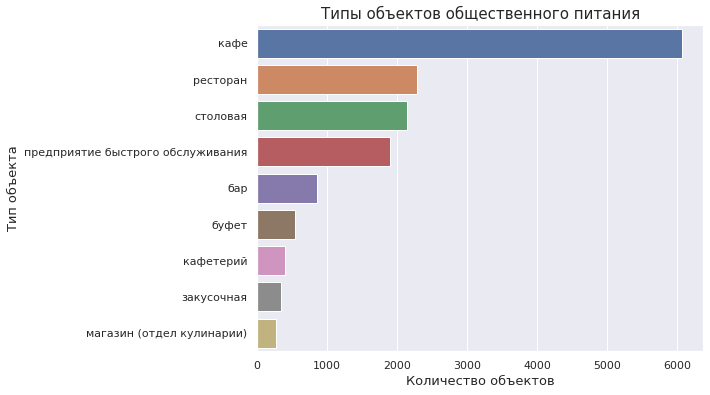

In [31]:
ax = sns.barplot(x="objects_count", y="object_type", data=object_type_data);
ax.set_title('Типы объектов общественного питания', fontsize = 15)
ax.set_ylabel("Тип объекта", fontsize = 13)
ax.set_xlabel("Количество объектов", fontsize = 13);

In [32]:
rest_data['object_type'].value_counts(normalize=True).map('{:.2%}'.format)

кафе                                 41.01%
ресторан                             15.42%
столовая                             14.44%
предприятие быстрого обслуживания    12.81%
бар                                   5.78%
буфет                                 3.67%
кафетерий                             2.67%
закусочная                            2.35%
магазин (отдел кулинарии)             1.84%
Name: object_type, dtype: object

Больше всего представлен вид общественного питания "Кафе" - около 40%. Приблизительно одинаковые доли занимают типы общественного питания "Столовая" (16.91%), "Ресторан" (14.93%) и "Предприятие быстрого обслуживания" (12.41%)   
Среди оставшихся типов общественного питания с малыми долями самый крупный - "Бар" (5.6%).

#### Исследуем соотношение сетевых и несетевых заведений по количеству

In [33]:
chain_data = rest_data['chain'].value_counts().reset_index()
chain_data

,index,chain
0,нет,11839
1,да,2964


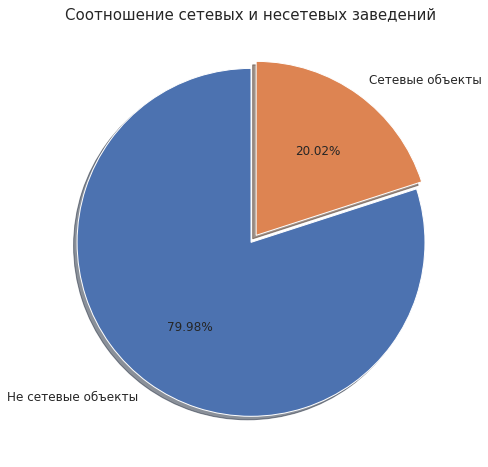

In [34]:
explode = (0, 0.05)
ax = chain_data['chain'].plot.pie(labels = ['Не сетевые объекты', 'Сетевые объекты'], shadow=True, explode=explode,
                                  startangle=90, figsize=(10, 8), fontsize=12,autopct='%.2f%%');
ax.set_title("Соотношение сетевых и несетевых заведений", fontsize = 15)
ax.set_ylabel("");

Видим, что несетевые заведения питания представлены в большем количестве, чем сетевые.

#### Выясним, для какого вида объекта общественного питания характерно сетевое распространение

Выделим только сетевые объекты, сгруппируем данные по типу объекта общественного питания и найдем число объектов общественного питания с сетевым распространением.

In [35]:
chains = rest_data[rest_data['chain'] == 'да']\
.groupby('object_type').agg(chain_count = ('id', 'count'))\
.reset_index()\
.set_index('object_type')
chains

,chain_count
object_type,
бар,37
буфет,11
закусочная,56
кафе,1396
кафетерий,52
магазин (отдел кулинарии),78
предприятие быстрого обслуживания,788
ресторан,543
столовая,3


Найдем общее число объектов общественного питания, сгруппированных по типу.

In [36]:
all_objects = rest_data.groupby('object_type')\
.agg(object_counts = ('id', 'count'))
all_objects

,object_counts
object_type,
бар,855
буфет,544
закусочная,348
кафе,6071
кафетерий,395
магазин (отдел кулинарии),273
предприятие быстрого обслуживания,1897
ресторан,2282
столовая,2138


Найдем относительную долю сетевых заведений.

In [37]:
chain_percentage = all_objects\
.join(chains, on='object_type')\
.eval('chain_percentage = chain_count/object_counts')\
.sort_values(by='chain_percentage', ascending=False)


chain_percentage[['chain_percentage']].style.format('{0:.2%}')

,chain_percentage
object_type,
предприятие быстрого обслуживания,41.54%
магазин (отдел кулинарии),28.57%
ресторан,23.79%
кафе,22.99%
закусочная,16.09%
кафетерий,13.16%
бар,4.33%
буфет,2.02%
столовая,0.14%


Text(0.5, 0, 'Доля сетевых объектов от числа всех объектов')

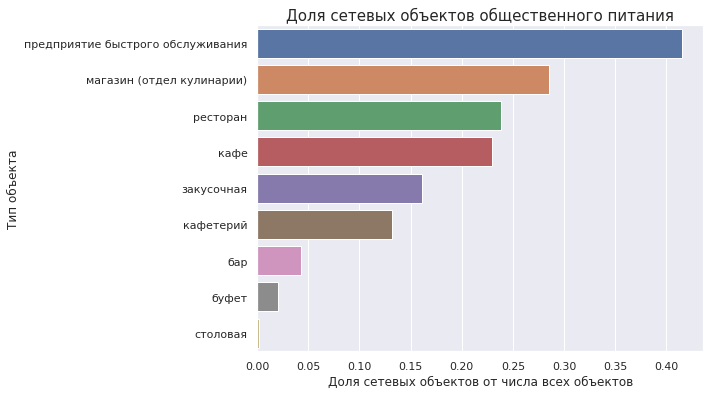

In [38]:
ax = sns.barplot(x="chain_percentage", y="object_type", data=chain_percentage.reset_index());
ax.set_title('Доля сетевых объектов общественного питания', fontsize = 15)
ax.set_ylabel("Тип объекта", fontsize = 12)
ax.set_xlabel("Доля сетевых объектов от числа всех объектов", fontsize = 12)

Наибольшую долю среди сетевых заведений занимают Предприятия быстрого обслуживания - 41,5%. Второе место по популярности занимают отделы кулинарии в магазинах - 28.57%.

Посмотрим на самые распространенные названия объектов-сетей.

In [39]:
rest_data[rest_data['chain'] == 'да']['object_new_name'].value_counts().head(10)

kfc                188
шоколадница        185
макдоналдс         171
бургер кинг        159
теремок            109
dominos pizza       99
крошка картошка     96
суши wok            90
милти               75
старбакс            69
Name: object_new_name, dtype: int64

In [40]:
rest_data[(rest_data['object_new_name'] == 'kfc')]['object_type'].value_counts()

предприятие быстрого обслуживания    123
ресторан                              36
кафе                                  31
закусочная                             1
Name: object_type, dtype: int64

In [41]:
rest_data[(rest_data['object_new_name'] == 'макдоналдс')]['object_type'].value_counts()

предприятие быстрого обслуживания    116
ресторан                              31
кафе                                  25
Name: object_type, dtype: int64

In [42]:
rest_data[(rest_data['object_new_name'] == 'бургер кинг')]['object_type'].value_counts()

предприятие быстрого обслуживания    113
кафе                                  26
ресторан                              17
закусочная                             5
бар                                    1
Name: object_type, dtype: int64

Сетевое распространение характерно больше для предприятий быстрого обслуживания. Например, объекты с большим количеством сетевых точек - KFC, Макдоналдс и Бургер Кинг. Но стоит заметить, что в каждой из этих сетей представлен не только этот один вид объекта питания. Например, в Макдоналдс есть и предприятия быстрого обслуживания, и кафе, и рестораны.

#### Проанализируем, что характерно для сетевых заведений

Сохраним отдельно только сетевые объекты питания.

In [43]:
chains = rest_data[rest_data['chain'] == 'да']
chains.head(3)

,id,object_name,chain,object_type,address,number,object_new_name
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,пиццетория
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,брусника
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32,алло пицца


Сгруппируем их по названию сети и найдем количество объектов в сети и среднее количество посадочных мест в этих объектах.

In [44]:
chains_grouped = chains\
.groupby('object_new_name')\
.agg(objects_count = ('id', 'count'), seats_median = ('number', 'median'))\
.sort_values(by='seats_median', ascending=False)
chains_grouped['seats_median'] = chains_grouped['seats_median'].astype('int')

In [45]:
chains_grouped.sort_values(by='objects_count')

,objects_count,seats_median
object_new_name,,
чешская пивная козловица,1,306
баракат,1,45
grand cru,1,45
tutti frutti,1,0
лаундж-мята lounge,1,45
...,...,...
теремок,109,24
бургер кинг,159,45
макдоналдс,171,76


Проверим столбцы полученного датафрейма на наличие выбросов.

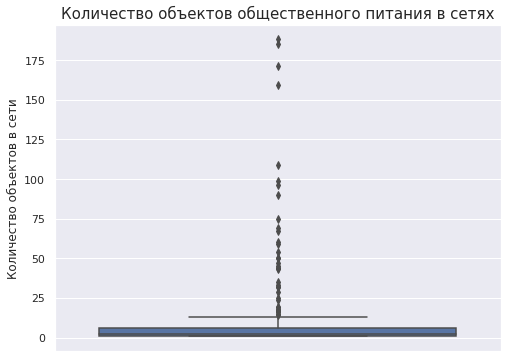

In [46]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))
ax.set_title("Количество объектов общественного питания в сетях", fontsize = 15)

sns.boxplot(y="objects_count", data=chains_grouped, ax=ax).set(
    ylabel='Количество объектов в сети')
plt.show()

Здесь мы видим очень длинный хвост из редких значений. Скорее всего это самые популярные в нашем списке выше сети - Макдоналдс, KFC, Бургер Кинг и другие. Видно, что сетей с количеством объектов более 75 уже не так много, а вот от 10 до 75 достаточно. Оставим их в нашем датасете. Уберем те, в которых количество объектов превышает 75.

In [47]:
chains_grouped[chains_grouped['objects_count'] > 75]

,objects_count,seats_median
object_new_name,,
макдоналдс,171,76
шоколадница,185,50
kfc,188,49
бургер кинг,159,45
теремок,109,24
dominos pizza,99,16
крошка картошка,96,15
суши wok,90,6


Таких у нас 8 объектов.

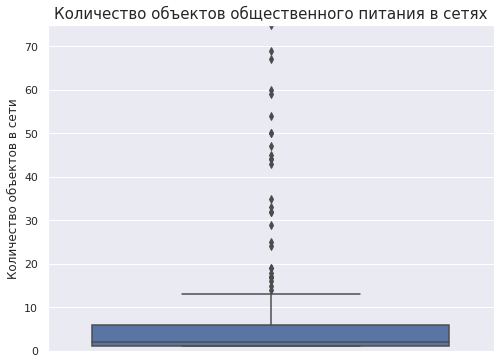

In [48]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

ax.set_ylim([0, 75])  
ax.set_title("Количество объектов общественного питания в сетях", fontsize = 15)

sns.boxplot(y="objects_count", data=chains_grouped, ax=ax).set(
    ylabel='Количество объектов в сети')
plt.show()

Boxplot нам говорит о том, что основная масса сетевых заведений - до 75% имеет до 6 объектов общественного питания в Москве. А половина из них вообще состоит из одного-двух объектов.

In [49]:
chains_grouped['objects_count'].describe()

count    315.000000
mean       9.409524
std       24.502968
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      188.000000
Name: objects_count, dtype: float64

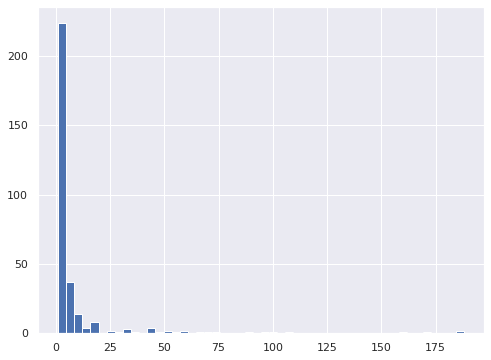

In [50]:
chains_grouped['objects_count'].hist(bins=50);

Рассмотрим количество посадочных мест в заведениях сетей.

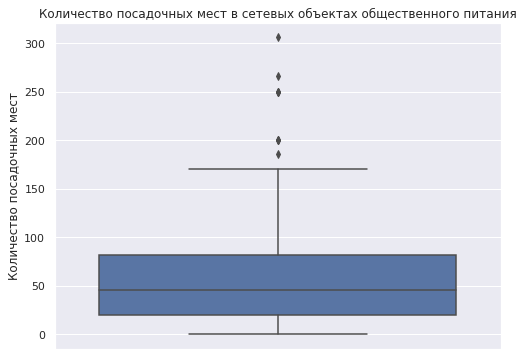

In [51]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))
 
sns.boxplot(y="seats_median", data=chains_grouped, ax=ax).set(
    ylabel='Количество посадочных мест',
title="Количество посадочных мест в сетевых объектах общественного питания")
plt.show()

Здесь совсем единичные выбросы. Уберем их из рассмотрения. Оставим заведения с количеством посадочных мест менее 175.

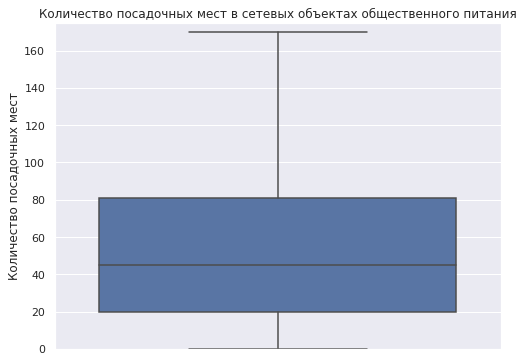

In [52]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))
ax.set_ylim([0, 175]) 
sns.boxplot(y="seats_median", data=chains_grouped, ax=ax).set(
    ylabel='Количество посадочных мест',
title="Количество посадочных мест в сетевых объектах общественного питания")
plt.show()

Виден большой разброс значений в количестве посадочных мест. От 20 до 80 мест предлагает половина сетевых заведений общественного питания из нашего датасета.

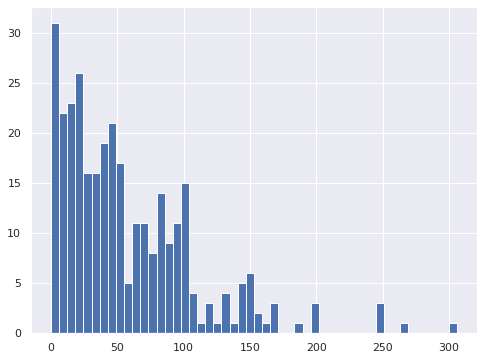

In [53]:
chains_grouped['seats_median'].hist(bins=50);

In [54]:
chains_grouped['seats_median'].describe()

count    315.000000
mean      57.384127
std       51.193604
min        0.000000
25%       20.000000
50%       45.000000
75%       81.000000
max      306.000000
Name: seats_median, dtype: float64

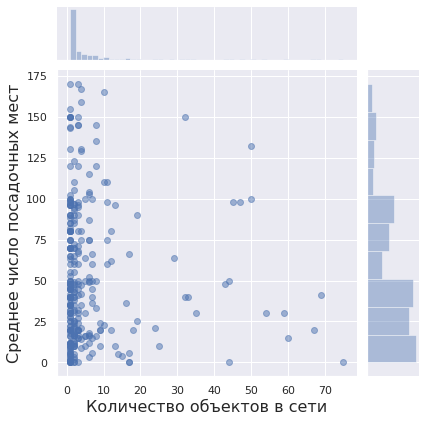

In [55]:
ax = sns.jointplot(x="objects_count", y="seats_median", 
              data=chains_grouped[(chains_grouped['objects_count']<=75) & (chains_grouped['seats_median']<=175)],
             joint_kws = dict(alpha=0.5))
ax.set_axis_labels('Количество объектов в сети', 'Среднее число посадочных мест', fontsize=16);


Видим, что для сетей характерно небольшое количество заведений (до 6) с небольшим числом посадочных мест. В половине заведений число мест меньше 45. По графику видно наибольшее скопление точек в области небольшого числа объектов с количеством посадочных мест от 0 до 50.

#### Проанализируем какой вид объекта общественного питания предоставляет в среднем самое большое количество посадочных мест

In [56]:
seats_data = rest_data\
.groupby('object_type')['number']\
.mean()\
.round().astype(int)\
.reset_index()\
.sort_values(by='number', ascending=False)

In [57]:
seats_data

,object_type,number
8,столовая,123
7,ресторан,97
1,буфет,50
0,бар,44
3,кафе,40
6,предприятие быстрого обслуживания,21
4,кафетерий,9
2,закусочная,8
5,магазин (отдел кулинарии),6


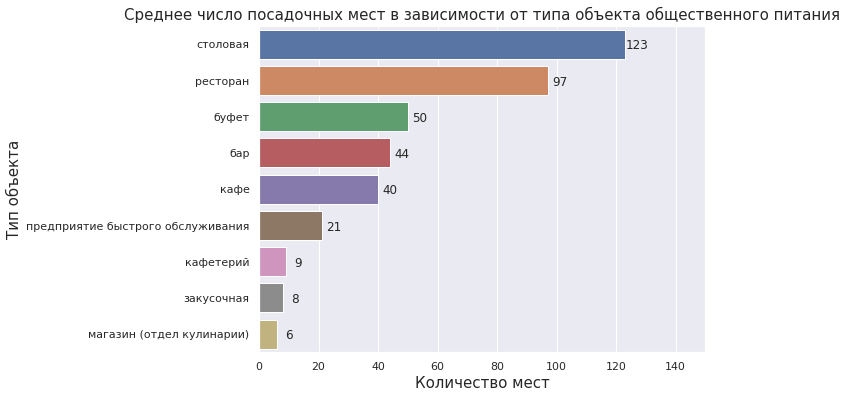

In [58]:
ax = sns.barplot(x="number", y="object_type", data=seats_data)
ax.set_xlim(0, 150)
ax.set_title('Среднее число посадочных мест в зависимости от типа объекта общественного питания', fontsize = 15)
ax.set_ylabel("Тип объекта", fontsize = 15)
ax.set_xlabel("Количество мест", fontsize = 15);        
for p in ax.patches:
    width = p.get_width()
    plt.text(4 + p.get_width(), p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

Самое большое среднее количество посадочных мест предоставляют столовые (123). На втором месте рестораны (97).

### Выделим информацию об улице из адреса

In [59]:
def get_street(address):
    """
    Возвращает название улицы или название поселка/номер микрорайона, если не указана улица
    Принимает полный адрес здания.
    """
    pattern = ['улица', 'переулок', 'проезд', 'шоссе', 'проспект', 'бульвар','набережная', 'просек', 
               'площадь', 'аллея', 'квартал','линия', 'тупик', 'микрорайон', 'территория', 'километр']
    chanks = address.split(',')
    
    # Обработаем сначала самые распространенные случаи
    for chank in chanks:
        if any(word in chank.strip() for word in pattern):
            return chank
    # Отдельно рассмотрим город Зеленоград, в котором вместо улиц часто встречаются 
    # номера корпусов, которые начинаются с номера микрорайона.
    try:
        if 'зеленоград' in address: 
            result = re.search('корпус (\d+),?', address)
            building_number = int(result.groups()[0])
            micro_region = building_number // 100
            return 'микрорайон ' + str(micro_region)
    except:
        print('Ошибка при парсинге адреса: ')
        print(address)
    
    # Также встречаются отдельные поселения с деревнями.
    # Так как их мало и нет названий улиц, будем считать, что название поселения и есть улица.
    try:
        if 'поселение' in address:
            result = re.search('(поселение [А-я -?]+, [А-я ё?]+ [А-я]+)\S', address)
            return (result.groups()[0])
    except:
        print('Ошибка при парсинге адреса: ')
        print(address)
    
    # Остались пара исключительных случаев.
    if address == 'город москва, поселение щаповское, вблизи пос.курилово, дом 1б/н':
        return 'поселение щаповское'
    if address == 'город москва, посёлок акулово, дом 43а, строение 1':
        return 'посёлок акулово'
    

In [60]:
rest_data['street'] = rest_data['address'].apply(get_street)

In [61]:
rest_data['street'].head(10)

0      улица егора абакумова
1           улица талалихина
2       абельмановская улица
3         абрамцевская улица
4         абрамцевская улица
5         абрамцевская улица
6     переулок сивцев вражек
7         авиамоторная улица
8         авиамоторная улица
9         авиамоторная улица
Name: street, dtype: object

In [62]:
rest_data[rest_data['street'].isna()]

,id,object_name,chain,object_type,address,number,object_new_name,street


Пропусков нет, все названия улиц удалось извлечь.

### Посмотрим на топ-10 улиц по количеству объектов общественного питания

In [63]:
top_streets = rest_data['street']\
.value_counts()\
.reset_index()\
.head(10)\
.rename(columns={'index': 'street', 'street': 'objects_count'})
top_streets

,street,objects_count
0,проспект мира,202
1,профсоюзная улица,179
2,ленинградский проспект,172
3,пресненская набережная,167
4,варшавское шоссе,164
5,ленинский проспект,144
6,проспект вернадского,127
7,кутузовский проспект,114
8,каширское шоссе,110
9,кировоградская улица,103


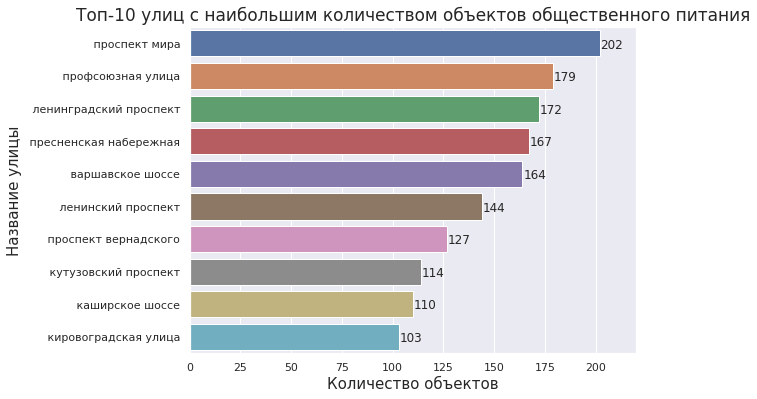

In [64]:
ax = sns.barplot(x="objects_count", y="street", data=top_streets)

ax.set_title('Топ-10 улиц с наибольшим количеством объектов общественного питания', fontsize = 17)
ax.set_ylabel("Название улицы", fontsize = 15)

ax.set_xlabel("Количество объектов", fontsize = 15);        
ax.set_xlim(0, 220)
for p in ax.patches:
    width = p.get_width()
    plt.text(6 + p.get_width(), p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

### Найдем районы, в которых проходят данные улицы

Воспользовавшись внешними источниками (распарсив википедию), мы нашли, в каких районах Москвы находятся топ-10 улиц с наибольшим количеством объектов общественного питания. 

<details>
<summary>Нажмите, чтобы просмотреть код.</summary>
<p>

```python
def get_district(url):
    """
    Возвращает название района, в котором проходит улица, указанная в url
    """
    req = requests.get(URL)
    soup = BeautifulSoup(req.text, 'lxml')

    table = soup.find('table', attrs={"class": "infobox vcard"})
    district_table = None
    districts = ''

    try:
        for row in table.find_all('tr'):
            header = row.find('th')
            if header is not None:
                if header.text == 'Район':
                    district_table = row
    except:
        print('Ошибка парсинга данных. ')
        return None
        
    if district_table is not None:
        for a in district_table.find_all('a'):
            districts += ', ' + a.text
            
    return districts[1:].strip()
    
# Приведем названия улиц к виду, в котором они записаны в адресной строке википедии
# Если улица встречается в нескольких городах, к её названию добавляем название города
    
top_streets['street_2'] = top_streets['street'].apply(lambda x: x.strip().capitalize().replace(' ', '_'))
top_streets.loc[top_streets['street_2'] == 'Проспект_мира', 'street_2'] = 'Проспект_Мира'
top_streets.loc[top_streets['street_2'] == 'Проспект_вернадского', 'street_2'] = 'Проспект_Вернадского'
top_list = top_streets['street_2'].to_list()
top_streets['district'] = ''
for street in top_list:
    URL = 'https://ru.wikipedia.org/wiki/' + street
    district = get_district(URL)
    if district is None:
        URL += '_(Москва)'
        district = get_district(URL)
    top_streets.loc[top_streets['street_2'] == street, 'district'] = district
```

</p>
</details>  

Мы получили такой список районов:

In [65]:
top_streets['district'] = pd.Series({
    0: 'Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино',
    1: 'Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево',
    2: 'Беговой, Аэропорт, Сокол, Хорошёвский',
    3: 'Пресненский',
    4: 'ЮАО, Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное, ЮЗАО, Южное Бутово, НАО, Щербинка',         
    5: 'Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино',
    6: 'Гагаринский, Ломоносовский, Раменки, Проспект Вернадского, Тропарёво-Никулино',
    7: 'Дорогомилово, Фили-Давыдково', 
    8: 'Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники',
    9: 'Чертаново Северное, Чертаново Центральное, Чертаново Южное'})

In [66]:
top_streets

,street,objects_count,district
0,проспект мира,202,"Мещанский, Марьина Роща, Алексеевский, Останки..."
1,профсоюзная улица,179,"Академический, Коньково, Обручевский, Тёплый С..."
2,ленинградский проспект,172,"Беговой, Аэропорт, Сокол, Хорошёвский"
3,пресненская набережная,167,Пресненский
4,варшавское шоссе,164,"ЮАО, Донской, Нагатино-Садовники, Нагорный, Че..."
5,ленинский проспект,144,"Якиманка, Донской, Гагаринский, Ломоносовский,..."
6,проспект вернадского,127,"Гагаринский, Ломоносовский, Раменки, Проспект ..."
7,кутузовский проспект,114,"Дорогомилово, Фили-Давыдково"
8,каширское шоссе,110,"Москворечье-Сабурово, Орехово-Борисово Северно..."
9,кировоградская улица,103,"Чертаново Северное, Чертаново Центральное, Чер..."


Сразу видно, что полученные улицы - очень длинные, простираются на несколько районов. Поэтому на них расположено много объектов общественного питания.  
Профсоюзная улица является одной из главных магистралей юго-запада Москвы.  
Ленинградский проспект является самой широкой улицей в Москве. На Ленинградском проспекте стоит стадион «Динамо». Не удивительно, что здесь много объектов общественного питания.   
Варшавское шоссе занимает 2-е место среди самых длинных улиц России.  

### Посмотрим сколько у нас улиц с одним объектом общественного питания

In [67]:
all_streets = rest_data['street']\
.value_counts()\
.reset_index()\
.rename(columns={'index': 'street', 'street': 'objects_count'})

In [68]:
all_streets[all_streets['objects_count'] == 1].shape[0]

583

Целых 583 улицы с одним объектом общественного питания.

In [69]:
all_streets[all_streets['objects_count'] == 1].head()

,street,objects_count
1370,спартаковский переулок,1
1371,аэрофлотская улица,1
1372,улица кошкина,1
1373,никольский проезд,1
1374,сверчков переулок,1


Составим датафрейм из тех адресов, на улицах которых только один объект общественного питания.

In [70]:
tail_streets = pd.DataFrame()

groupped = rest_data.groupby('street')

for name, group in groupped:    
    if len(group) == 1:       
        tail_streets = tail_streets.append(group)    

In [71]:
tail_streets.head()

,id,object_name,chain,object_type,address,number,object_new_name,street
69,22139,хуанхэ,нет,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,хуанхэ,1-й балтийский переулок
3276,152133,столовая института мировых цивилизаций,нет,столовая,"город москва, 1-й басманный переулок, дом 3, с...",50,столовая института мировых цивилизаций,1-й басманный переулок
5301,21527,буфет при гуп «объединенный комбинат школьно п...,нет,столовая,"город москва, 1-й ботанический проезд, дом 2",40,буфет при гуп объединенный комбинат школьно пи...,1-й ботанический проезд
4579,28085,столовая гну виэсх,нет,столовая,"город москва, 1-й вешняковский проезд, дом 2, ...",20,столовая гну виэсх,1-й вешняковский проезд
7939,146400,шелби,нет,кафе,"город москва, 1-й голутвинский переулок, дом 6",22,шелби,1-й голутвинский переулок


Воспользуемся сайтом `geocode-maps.yandex.ru` и найдем координаты данных адресов и названия районов, в которых они находятся.

<details>
<summary>Нажмите, чтобы просмотреть код. Получение координат по адресу объекта.</summary>
<p>

```python
def get_coords_from_address(row):
    """
    Возвращает координаты для адреса из строки row.
    """
    
    API_key = '46456fa8-0a4d-4889-8f84-955d3896c074'
    region = None
    
    # Получаем координаты здания
    address = row['address']
    URL = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + API_key + '&geocode=' + address

    req = requests.get(URL)
    if req.status_code != 200:
        print(req.status_code)
        print('Error request in address ', address)
        
    soup = BeautifulSoup(req.text, 'lxml')
    
    try:
        found = soup.find('found')
        if int(found.text) == 0:
            print('Ничего не найдено для адреса ', address)
            return None
        point = soup.find('point')
        position = point.find('pos')
    except:
        print('Ошибка получения координат row: ', row.name, 'по улице: ', address)
        return None
    
    return position.text
```

</p>
</details>

<details>
<summary>Нажмите, чтобы просмотреть код. Получение района по координатам объекта.</summary>
<p>

```python
def get_district_from_coords(row):
    
    API_key = '46456fa8-0a4d-4889-8f84-955d3896c074'
    district = None
    position = row['coords']
    
    # Если не удалось ранее получить координаты, не можем найти район
    if position is None:
        return None
    
    address = row['address']
    
    # Получаем более подробную информацию по координатам
    URL_with_coords = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + API_key + '&geocode=' + \
    position.replace(' ', ',') + '&kind=district&results=1'
                  
    req_with_coords = requests.get(URL_with_coords)
    
    if req_with_coords.status_code != 200:
        print('Error request in address ', address)
        print(req_with_coords.status_code)
        
    soup = BeautifulSoup(req_with_coords.text, 'lxml')
    
    try:
        found = soup.find('found')
        if int(found.text) == 0:
            print('Ничего не найдено для адреса ', address)
            return None
        administrativearea = soup.find('administrativearea')
        dependentlocality_1 = administrativearea.find('dependentlocality')
        dependentlocality_2 = dependentlocality_1.find('dependentlocality')
        dependentlocalityname = dependentlocality_2.find('dependentlocalityname')
        district = dependentlocalityname.text
    except:
        print('Ошибка получения региона row: ', row.name, 'по улице: ', address)
    
    # Район может быть не найден, если это поселение или город в Москве.
    # В таком случае можем найти административный округ.
    if district is None:
        try:
            subadministrativeareaname = soup.find('subadministrativeareaname')
            district = subadministrativeareaname.text
        except:
            print('Ошика получения подрегиона по адресу: ', address)
    
    return district
```

</p>
</details>

<details>
<summary>Нажмите, чтобы просмотреть код. Применение функций.</summary>
<p>

```python
tail_streets['coords'] = tail_streets.apply(get_coords_from_address, axis=1)
Ничего не найдено для адреса  город москва, 104-й километр московской кольцевой автодороги, дом 6
Ничего не найдено для адреса  город москва, 26-й километр московской кольцевой автодороги, владение 6
Ничего не найдено для адреса  город москва, 30-й километр московской кольцевой автодороги, владение 6
Ничего не найдено для адреса  город москва, 31-й километр московской кольцевой автодороги, владение 8, строение 1
Ничего не найдено для адреса  город москва, 34-й километр московской кольцевой автодороги, владение 6
Ничего не найдено для адреса  город москва, 42-й километр московской кольцевой автодороги, владение 4, строение 1
Ничего не найдено для адреса  город москва, 56-й километр московской кольцевой автодороги, дом 10
Ничего не найдено для адреса  город москва, 65-й километр московской кольцевой автодороги, владение 8
Ничего не найдено для адреса  город москва, 67-й километр московской кольцевой автодороги, дом 7
Ничего не найдено для адреса  город москва, 78-й километр московской кольцевой автодороги, дом 14, корпус 1
Ничего не найдено для адреса  город москва, 80-й километр московской кольцевой автодороги, дом 4, строение 1
    
tail_streets['district'] = tail_streets.apply(get_district_from_coords, axis=1)
```

</p>
</details>

Загрузим полученную таблицу.

In [72]:
spreadsheet_id = '1-rsjxcXBNSyIhw-F6dqYucCrCU46mmyrHy0_Quj2yi0'

file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
req = requests.get(file_name)
tail_streets = pd.read_csv(BytesIO(req.content))

In [73]:
tail_streets.head()

,id,object_name,chain,object_type,address,number,object_new_name,street,coords,district,district_name
0,22139,хуанхэ,нет,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,хуанхэ,1-й балтийский переулок,37.518785 55.810471,район Аэропорт,Аэропорт
1,152133,столовая института мировых цивилизаций,нет,столовая,"город москва, 1-й басманный переулок, дом 3, с...",50,столовая института мировых цивилизаций,1-й басманный переулок,37.662838 55.770785,Красносельский район,Красносельский
2,21527,буфет при гуп «объединенный комбинат школьно п...,нет,столовая,"город москва, 1-й ботанический проезд, дом 2",40,буфет при гуп объединенный комбинат школьно пи...,1-й ботанический проезд,37.635979 55.850707,район Свиблово,Свиблово
3,28085,столовая гну виэсх,нет,столовая,"город москва, 1-й вешняковский проезд, дом 2, ...",20,столовая гну виэсх,1-й вешняковский проезд,37.78792 55.724312,Рязанский район,Рязанский
4,146400,шелби,нет,кафе,"город москва, 1-й голутвинский переулок, дом 6",22,шелби,1-й голутвинский переулок,37.613494 55.7396,район Якиманка,Якиманка


In [74]:
tail_streets['coords'].isna().sum()

11

Для 11 адресов не найдены координаты.  

In [75]:
tail_streets['district'].isna().sum()

20

Всего не удалось получить названия районов для 20 адресов.   
В датасете также встречались адреса, для которых не был найден район. Для них нашелся только округ. Посмотрим топ полученных районов.

In [76]:
tail_streets['district_name'].value_counts().head(20)

Новомосковский административный округ    28
Таганский                                27
Басманный                                22
Троицкий административный округ          22
Хамовники                                22
Пресненский                              20
Тверской                                 17
Марьина Роща                             17
Сокольники                               15
Лефортово                                12
Замоскворечье                            12
Мещанский                                12
Соколиная Гора                           11
Красносельский                           10
Даниловский                              10
Арбат                                    10
Богородское                              10
Якиманка                                  9
Южное Бутово                              9
Люблино                                   8
Name: district_name, dtype: int64

В Новомосковский административный округ входят такие населенные пункты, как Внуковское, Воскресенское, Десёновское, Кокошкино, Марушкинское, Московский, «Мосрентген», Рязановское, Сосенское, Филимонковское и Щербинка. Этот округ был образован в результате проекта по расширению территории города Москвы. То есть поселения, входящие в него, не находятся в центре города и до 2012 года не входили в город Москва.  
Троицкий административный округ также был присоединен к городу  в 2012 году и по местоположению он наиболее отдален от центра.

In [77]:
tail_streets = tail_streets.dropna(subset=['district_name'])

In [78]:
tail_streets['district_name'].isna().sum()

0

Чтобы нагляднее представлять себе расположение объектов общественного питания на улицах из топ-10, мы составили карту.  

In [86]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://yadi.sk/i/37M2G1dS3yiQ_w'

In [89]:
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)

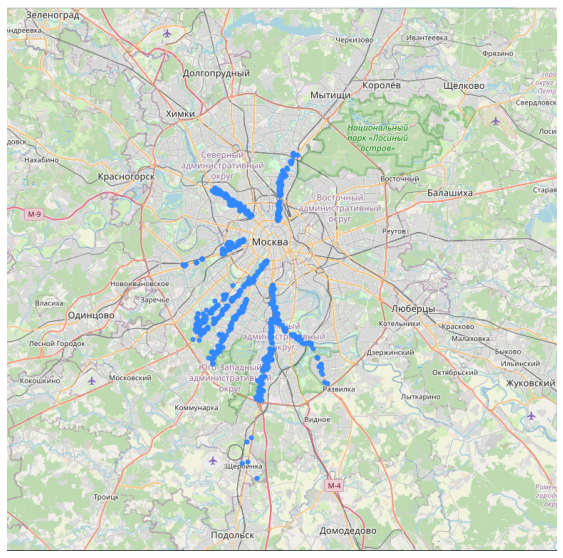

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
img = Image.open(BytesIO(download_response.content)) 
ax.imshow(img)
ax.axis('off')
plt.show()

Также мы отметили и адреса из таблицы с улицами, на которых расположен только один объект общественного питания.  

In [93]:
public_key = 'https://yadi.sk/i/7YldLUolmtgtsQ' 
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
download_response = requests.get(download_url)

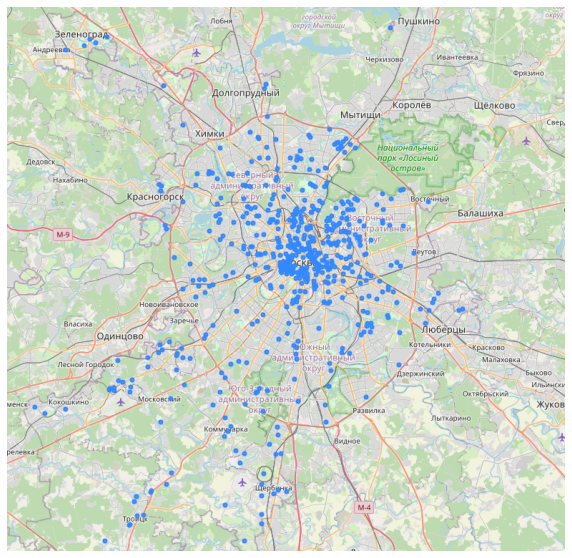

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
img = Image.open(BytesIO(download_response.content)) 
ax.imshow(img)
ax.axis('off')
plt.show()

По карте видно, что улицы из топ-10 действительно очень длинные и расходятся в разные стороны из центра Москвы, но в пределах МКАД.  
В то время как улицы с одним объектом питания скорее всего короткие, например, какие-нибудь тупики в центре и не только. Они разбросаны по всей Москве и присоединенным территориям.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [79]:
top_10_streets_data = rest_data[rest_data['street'].isin(top_streets['street'].to_list())]

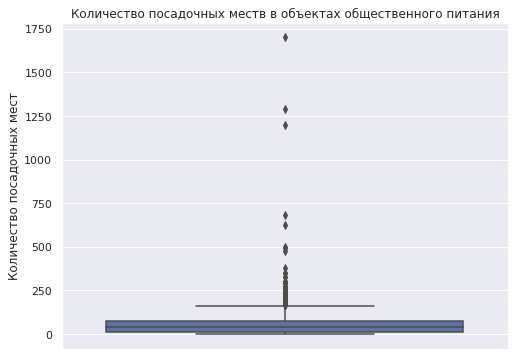

In [80]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))

sns.boxplot(y="number", data=top_10_streets_data, ax=ax).set(
    ylabel='Количество посадочных мест',
title="Количество посадочных меств в объектах общественного питания")
plt.show()

Есть отдельные выбросы с огромным количеством посадочных мест, но их немного. Скорее всего это крупные банкетные залы или столовые.

In [81]:
top_10_streets_data[top_10_streets_data['number'] > 1000]

,id,object_name,chain,object_type,address,number,object_new_name,street
4480,27024,рум сервис,нет,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200,рум сервис,кутузовский проспект
9064,19719,комбинат питания «управление академсервис»,нет,столовая,"город москва, проспект вернадского, дом 84, ст...",1288,комбинат питания управление академсервис,проспект вернадского
12723,199696,arena by soho family,нет,бар,"город москва, кутузовский проспект, дом 36, ст...",1700,arena by soho family,кутузовский проспект


Оставим в рассмотрении количество мест до 300.

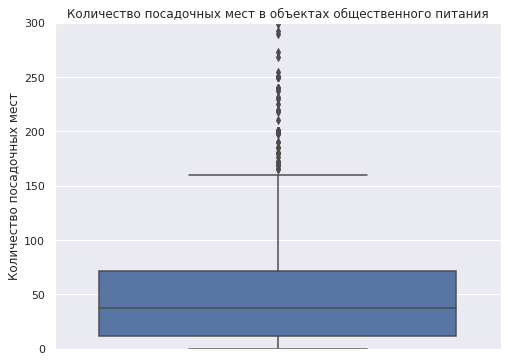

In [82]:
fig, ax = plt.subplots(1, 1,figsize=(8, 6))
ax.set_ylim([0, 300]) 
sns.boxplot(y="number", data=top_10_streets_data, ax=ax).set(
    ylabel='Количество посадочных мест',
title="Количество посадочных мест в объектах общественного питания")
plt.show()

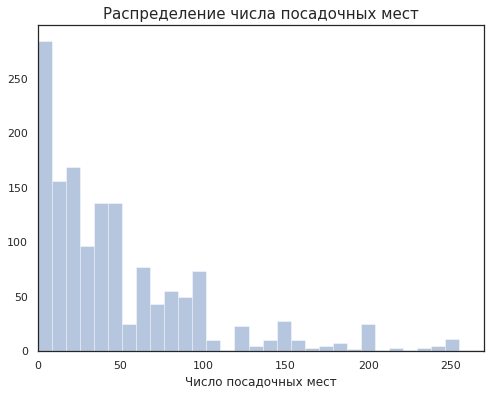

In [83]:
sns.set(style="white")
fig, axes = plt.subplots(1, 1, figsize=(8, 6))      
sns.distplot(top_10_streets_data['number'], kde=False, bins=200, axlabel='Число посадочных мест') ; 
axes.set_xlim([0,270])
axes.set_title('Распределение числа посадочных мест', fontsize = 15)
plt.show()

In [84]:
top_10_streets_data['number'].describe()

count    1482.000000
mean       56.701080
std        89.033647
min         0.000000
25%        12.000000
50%        37.500000
75%        71.750000
max      1700.000000
Name: number, dtype: float64

В 75% заведений количество мест не превышает 71. Также видим большое количество заведений без посадочных мест.  
Медиана составляет около 38 мест.

In [85]:
print('{:.2%}'.format(top_10_streets_data[top_10_streets_data['number'] == 0].shape[0]/top_10_streets_data.shape[0]))

10.86%


Больше 10% заведений вообще не имеют посадочных мест. По-видимому, это заведения быстрого обслуживания на вынос.

## Вывод<a class="anchor" id="step3-bullet"></a>

Целью нашего исследования было узнать, как обстоят дела на рынке заведений общественного питания Москвы, чтобы оценить степень риска при открытии нового оригинального заведения с официантами роботами. 
  
  
Мы изучили открытые данные о заведениях общественного питания в Москве и выяснили, что самым распространенным видом заведения является "Кафе" и его доля составляет около 40% от всех заведений. Приблизительно одинаковые доли занимают типы общественного питания "Столовая" (16.91%), "Ресторан" (14.93%) и "Предприятие быстрого обслуживания" (12.41%).
Среди оставшихся типов общественного питания с малыми долями самый крупный - "Бар" (5.6%).  
  
Также мы узнали, что около 80% заведений - несетевые. А самый распространенный вид объектов общественного питяния среди сетевых заведений - Предприятия быстрого обслуживания - 41,5%. Второе место по популярности занимают отделы кулинарии в магазинах - 28.57%.  
  
  
Мы выяснили, что для сетей характерно небольшое количество заведений (до 6) с небольшим числом посадочных мест. В половине заведений число мест меньше 45. По графику видно наибольшее скопление точек в области небольшого числа объектов с количеством посадочных мест от 0 до 50.
  
Для каждого вида объекта общественного питания мы описали среднее количество посадочных мест. Самое большое среднее количество посадочных мест предоставляют столовые (123). На втором месте рестораны (97).  
  
Также мы выделили топ-10 улиц с наибольшим количеством объектов общественного питания. Среди них оказались: Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, Проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица. Полученные улицы - очень длинные, простираются на несколько районов. Поэтому на них расположено много объектов общественного питания.  
  
Мы выяснили, что в датасете 583 улицы, на которых расположен только один объект общественного питания. Также мы нашли в каких районах или административных округах Москвы находятся эти улицы.   
  
Для наглядности мы отобразили на карте объекты из топ-10 улиц и из улиц с одним объектом. Оказалось, что топ-10 улиц находятся в пределах МКАД, в то время как остальные объекты разбросаны по всей Москве, включая присоединенные территории.    

Посмотрев на распределение количества посадочных мест для топ-10 улиц с большим количеством объектов общественного питания, мы выяснили, что в 75% заведений количество мест не больше 71. А 10% заведений вообще не предоставляют посадочные места.

### Рекомендации

Исходя из сделанных выводов, рекомендуем следовать популярным тенденциям. Так как в нашем заведении предполагается наличие официантов, значит, предполагается наличие посадочных мест. Поэтому формат Предприятия быстрого обслуживания без мест нам не подходит.  
В качестве вида заведения следует выбрать Кафе. 
В сетевых объектах общественного питания медиана количества посадочных мест равна 45. У топ-10 улиц по количеству заведений медиана числа посадочных мест равна 38. Предлагаем в новом заведении наличие до 50 посадочных мест.
  
В качестве района расположения будущего заведения предлагаем присмотреться к районам внутри МКАД. Например, районы, в которых находится топ-10 улиц с наибольшим количеством заведений.  Красносельский, Алексеевский, Академический и т. д.  
      
Также можно обратить внимание на не отдаленные от центра районы, в которых находятся улицы с одним заведением. Такие, как Замоскворечье, Арбат, Тверской, Таганский, Мещанский.  
  
Если в планах есть формирование сети, то наиболее популярными видами заведений после предприятий быстрого обслуживания и отделов кулинарии являются рестораны и кафе. Количество посадочных мест в сетях также в среднем в пределах 50. Число точек - от 2 до 6.  
   
Также хочется добавить, что для более точной рекомендации района расположения будущего объекта общественного питания имеющихся у нас данных недостаточно. Для этого нужно рассмотреть проходимость улиц, объекты по соседству, средний чек уже имеющихся заведений.

* [Наверх к оглавлению](#toc)